<a href="https://colab.research.google.com/github/perellama/Algoritmos-de-optimizaci-n/blob/main/Algoritmos_AG2_Mikel_Pereda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Mikel Pereda <br>
Link:   https://colab.research.google.com/drive/1DvIg9x7Wcza0CsIEgB7dDryxPFPe24E0#scrollTo=ta1tvzVvsKPC<br>
<br>




In [1]:
import math
import numpy as np

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

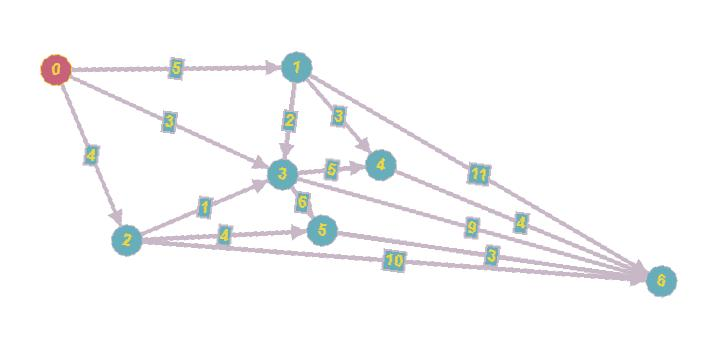

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E
import numpy as np

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR



valor((0,1),COSTES)

26

In [8]:
#Fuerza Bruta
import itertools

def Fuerza_bruta(COSTES):

  mejor_solucion=()
  mejor_valor=10e10

  for s in list(itertools.permutations(range(len(COSTES)))):
    if valor(s,COSTES)<mejor_valor:
      mejor_solucion=s
      mejor_valor=valor(s,COSTES)
  print("La mejor solución es :", mejor_solucion, "con valor:",mejor_valor)

Fuerza_bruta(COSTES)

La mejor solución es : (0, 2, 3, 1) con valor: 61


In [9]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((),COSTES)

58

In [13]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [14]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [15]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  #print(MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )


  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)
    #print(NODOS)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]


    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #print(HIJOS)
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]



    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor      ]
    #print(NODOS)

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


-El método expuesto en clase para obtener el CI no le importa si se repiten tareas, por lo que voy a hacer la prueba de realizar el ejercicio con un CI que elija el menor de las tareas que quedan libres.

In [16]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI_(S,COSTES):

  #Valores establecidos
  VALOR =valor(S,COSTES)

  #Estimacion
  for i in range( len(COSTES)   ):
    if i not in S:
        VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS_(S,COSTES):

  #Valores establecidos
  VALOR =valor(S,COSTES)

  #Estimacion
  for i in range( len(COSTES)   ):
    if i not in S:
        VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((),COSTES)

58

In [17]:
def ramificacion_y_poda_(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  #print(MEJOR_SOLUCION)
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI_((),COSTES)    } )


  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)
    #print(NODOS)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI_(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]


    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #print(HIJOS)
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]



    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor      ]
    #print(NODOS)

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda_(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  14  iteraciones  para dimension:  4


In [18]:
for i in range(4,10):
  COSTES=np.random.randint(11,40,size=(i,i))
  %time ramificacion_y_poda(COSTES)
  %time ramificacion_y_poda_(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 68}]  en  8  iteraciones  para dimension:  4
CPU times: user 286 µs, sys: 64 µs, total: 350 µs
Wall time: 355 µs
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 68}]  en  6  iteraciones  para dimension:  4
CPU times: user 0 ns, sys: 287 µs, total: 287 µs
Wall time: 291 µs
La solucion final es: [{'s': (3, 0, 1, 4, 2), 'ci': 103}]  en  29  iteraciones  para dimension:  5
CPU times: user 585 µs, sys: 307 µs, total: 892 µs
Wall time: 897 µs
La solucion final es: [{'s': (3, 0, 1, 4, 2), 'ci': 103}]  en  39  iteraciones  para dimension:  5
CPU times: user 8.52 ms, sys: 0 ns, total: 8.52 ms
Wall time: 8.53 ms
La solucion final es: [{'s': (4, 0, 2, 5, 1, 3), 'ci': 100}]  en  224  iteraciones  para dimension:  6
CPU times: user 14.8 ms, sys: 0 ns, total: 14.8 ms
Wall time: 15.1 ms
La solucion final es: [{'s': (2, 0, 5, 1, 4, 3), 'ci': 99}]  en  49  iteraciones  para dimension:  6
CPU times: user 5.53 ms, sys: 0 ns, total: 5.53 ms
Wall time: 5.37

-Se puede observar que realizando dicho cambio en el CI obtiene mejores resultados en menos iteraciones y tiempo de ejecucuión.

-Voy a realizar la prueba de hasta que que tamaño de matriz se puede realizar el ejercicio mediante fuerza bruta.

In [ ]:
for i in range(4,14):
  COSTES=np.random.randint(11,40,size=(i,i))
  %time Fuerza_bruta(COSTES)


La mejor solución es : (0, 1, 2, 3) con valor: 81
CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 2.39 ms
La mejor solución es : (2, 3, 0, 1, 4) con valor: 88
CPU times: user 435 µs, sys: 0 ns, total: 435 µs
Wall time: 438 µs
La mejor solución es : (1, 0, 5, 4, 3, 2) con valor: 107
CPU times: user 6.26 ms, sys: 0 ns, total: 6.26 ms
Wall time: 6.91 ms
La mejor solución es : (0, 4, 5, 2, 6, 3, 1) con valor: 95
CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 10.6 ms
La mejor solución es : (7, 6, 0, 1, 5, 2, 4, 3) con valor: 131
CPU times: user 154 ms, sys: 1.66 ms, total: 156 ms
Wall time: 156 ms
La mejor solución es : (3, 5, 1, 7, 2, 4, 6, 8, 0) con valor: 123
CPU times: user 831 ms, sys: 15.1 ms, total: 846 ms
Wall time: 851 ms
La mejor solución es : (8, 5, 6, 7, 4, 0, 2, 3, 9, 1) con valor: 139
CPU times: user 9.43 s, sys: 166 ms, total: 9.59 s
Wall time: 9.64 s


A partir de una matriz de 10x10 deja de ser una posibilidad utilizar fuerza bruta

In [ ]:
for i in range(4,25):
  COSTES=np.random.randint(11,40,size=(i,i))
  %time ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (2, 0, 3, 1), 'ci': 65}]  en  12  iteraciones  para dimension:  4
CPU times: user 2.34 ms, sys: 0 ns, total: 2.34 ms
Wall time: 2.34 ms
La solucion final es: [{'s': (2, 1, 3, 0, 4), 'ci': 118}]  en  12  iteraciones  para dimension:  5
CPU times: user 426 µs, sys: 0 ns, total: 426 µs
Wall time: 430 µs
La solucion final es: [{'s': (5, 4, 3, 0, 1, 2), 'ci': 115}]  en  65  iteraciones  para dimension:  6
CPU times: user 6.52 ms, sys: 605 µs, total: 7.12 ms
Wall time: 7.45 ms
La solucion final es: [{'s': (2, 5, 6, 4, 1, 0, 3), 'ci': 122}]  en  95  iteraciones  para dimension:  7
CPU times: user 5.04 ms, sys: 1.01 ms, total: 6.05 ms
Wall time: 5.9 ms
La solucion final es: [{'s': (1, 0, 7, 2, 4, 3, 5, 6), 'ci': 124}]  en  547  iteraciones  para dimension:  8
CPU times: user 31.8 ms, sys: 0 ns, total: 31.8 ms
Wall time: 32.3 ms
La solucion final es: [{'s': (1, 7, 4, 5, 6, 8, 0, 2, 3), 'ci': 122}]  en  1052  iteraciones  para dimension:  9
CPU times: user 104 ms, sy

KeyboardInterrupt: 

KeyboardInterrupt: 

KeyboardInterrupt: 

KeyboardInterrupt: 

-La ramificación y poda con el CI original, llega a una matriz de 12x12

In [ ]:
for i in range(4,25):
  COSTES=np.random.randint(11,40,size=(i,i))
  %time ramificacion_y_poda_(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 74}]  en  13  iteraciones  para dimension:  4
CPU times: user 812 µs, sys: 0 ns, total: 812 µs
Wall time: 725 µs
La solucion final es: [{'s': (2, 1, 4, 0, 3), 'ci': 82}]  en  32  iteraciones  para dimension:  5
CPU times: user 830 µs, sys: 0 ns, total: 830 µs
Wall time: 822 µs
La solucion final es: [{'s': (5, 1, 3, 4, 0, 2), 'ci': 93}]  en  21  iteraciones  para dimension:  6
CPU times: user 686 µs, sys: 0 ns, total: 686 µs
Wall time: 691 µs
La solucion final es: [{'s': (5, 2, 4, 0, 6, 3, 1), 'ci': 115}]  en  142  iteraciones  para dimension:  7
CPU times: user 4.78 ms, sys: 0 ns, total: 4.78 ms
Wall time: 4.74 ms
La solucion final es: [{'s': (1, 6, 7, 2, 0, 4, 3, 5), 'ci': 138}]  en  467  iteraciones  para dimension:  8
CPU times: user 40.6 ms, sys: 0 ns, total: 40.6 ms
Wall time: 41.8 ms
La solucion final es: [{'s': (7, 1, 4, 8, 3, 0, 5, 2, 6), 'ci': 128}]  en  603  iteraciones  para dimension:  9
CPU times: user 43.2 ms, sys: 1.9 ms, 

KeyboardInterrupt: 

KeyboardInterrupt: 

KeyboardInterrupt: 

KeyboardInterrupt: 

-La ramificación y poda con el CI modificado, llega a una matriz de 16x16

##Descenso del gradiente

In [19]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [20]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])


[2, 4]

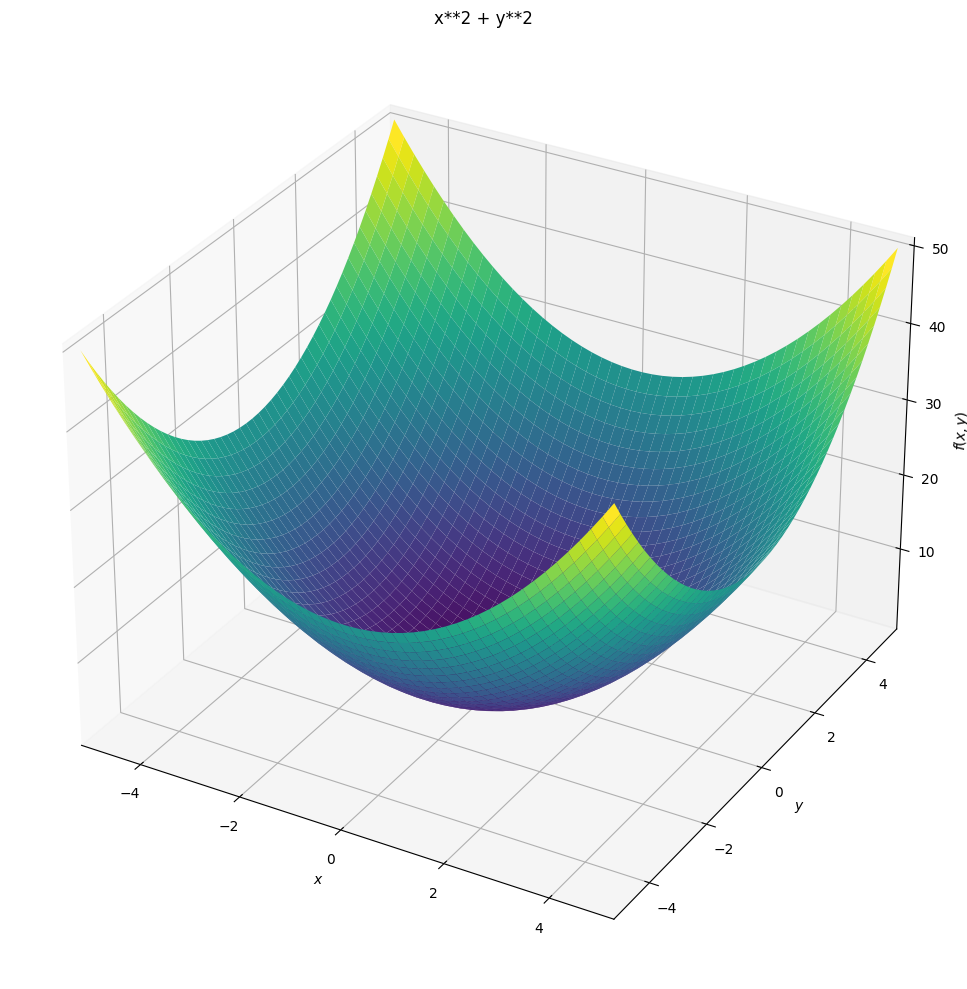

In [21]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

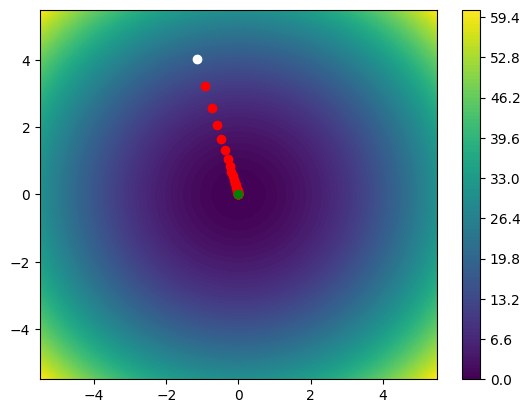

Solucion: [-1.6562355458670773e-05, 5.7532210872811655e-05] 3.584266906253029e-09


In [22]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
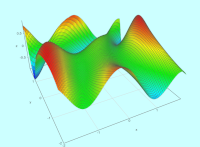


In [23]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [24]:
def aprox_derivada(punto,f):
  h=0.0001
  T=np.copy(punto)
  T=np.asfarray(T)
  grad=np.zeros(2)
  for it,th in enumerate(punto):
    T[it]=T[it]+h
    grad[it]=(f(T)-f(punto))/h
    T[it]=T[it]-h

  return grad



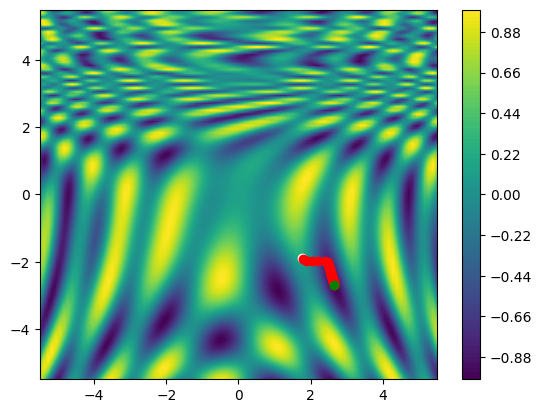

Solucion: [2.6592710295428637, -2.685302907652579] -0.99924534124983


In [27]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = aprox_derivada(P,f)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

-Existe la posibilidad de que nos quedemos en un mínimo local dependiendo del punto de incio que se tome. Ejecutando varias veces la celda, la menor solución obtenido es la que se plasma.